In [1]:
from astropy.io import fits
import numpy as np
from matplotlib import pyplot as plt
from astropy.visualization import quantity_support
quantity_support()
import glob
import gzip

In [4]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [18, 8]

In [108]:
files = glob.glob('data/dr14/*.fits')

In [109]:
files[:10]

['data/dr14/spec-0324-51616-0194.fits',
 'data/dr14/spec-2063-53359-0486.fits',
 'data/dr14/spec-2037-53446-0560.fits',
 'data/dr14/spec-2175-54612-0006.fits',
 'data/dr14/spec-2260-53638-0619.fits',
 'data/dr14/spec-1153-52933-0075.fits',
 'data/dr14/spec-1905-53706-0598.fits',
 'data/dr14/spec-2192-54232-0385.fits',
 'data/dr14/spec-1740-53050-0379.fits',
 'data/dr14/spec-1096-52974-0387.fits']

In [4]:
with fits.open(files[0]) as f:
    specdata = f[1].data

In [110]:
def display_spectra(idx):
    with fits.open(files[idx]) as f:
        specdata = f[1].data
    plt.plot(specdata['loglam'], specdata['flux'])
    return plt.show()

Vectors are of length 4000, with equivalent loglams ranging from 3.5725 to 3.9725

In [111]:
lam2vec = lambda x : (10000 * np.round(x-3.5725, 4)).astype(np.int32)

In [112]:
def read_spectra(file):
    with fits.open(file) as f:
        specdata = f[1].data
        
    return specdata['loglam'], specdata['flux']

def write_vec(file):
    vec = np.zeros(4000, dtype=np.float32)
    lam, flux = read_spectra(file)
    i, s = lam2vec(lam)[0], lam.shape[0]
    vec[i:i+s] = flux
    return vec

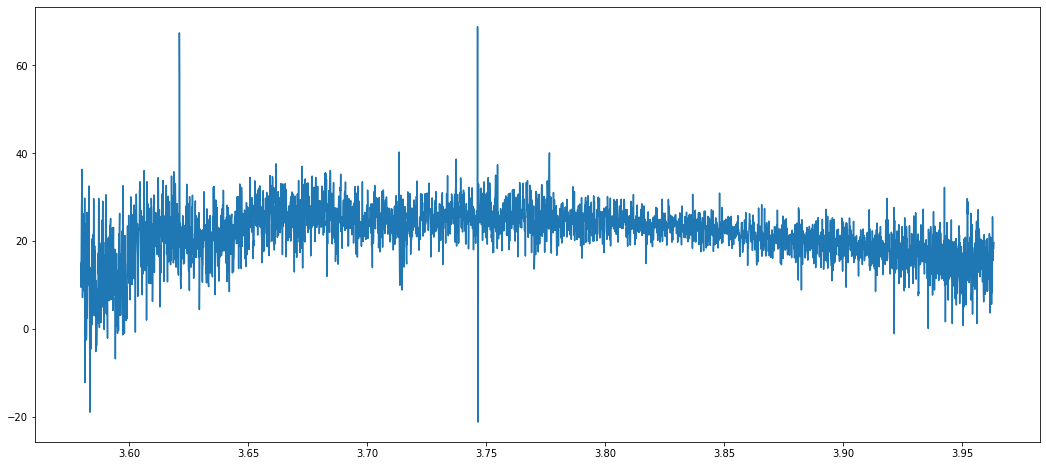

In [113]:
display_spectra(0)

In [114]:
lam2vec(specdata['loglam'])

array([  72,   73,   74, ..., 3907, 3908, 3908], dtype=int32)

In [115]:
specdata['flux']

array([14.921837,  9.466149, 18.472567, ..., 18.208101, 19.003216,
       19.636297], dtype=float32)

In [117]:
write_vec(files[123])[100:120]

array([ 0.      ,  0.      ,  0.      ,  0.      ,  0.      , 17.037506,
       21.788557, 21.000523, 25.376778, 27.206047, 22.796844, 18.60668 ,
       12.570372, 16.418938, 26.319586, 23.715712, 22.832556, 22.152699,
       19.780577, 11.218427], dtype=float32)

In [118]:
vecs = []
for i, file in enumerate(files):
    vecs.append(write_vec(file))
    
    if i % 5000 == 0:
        print(i)

0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
100000
105000
110000
115000
120000
125000
130000
135000
140000
145000
150000
155000
160000
165000
170000
175000
180000
185000
190000
195000
200000
205000
210000
215000
220000
225000
230000
235000
240000
245000
250000
255000
260000
265000
270000
275000
280000
285000
290000
295000


In [119]:
A = np.stack(vecs, axis=0)

In [120]:
A.shape

(300000, 4000)

In [121]:
A.dtype

dtype('float32')

In [31]:
np.save('spectra_vecs.npy', A)

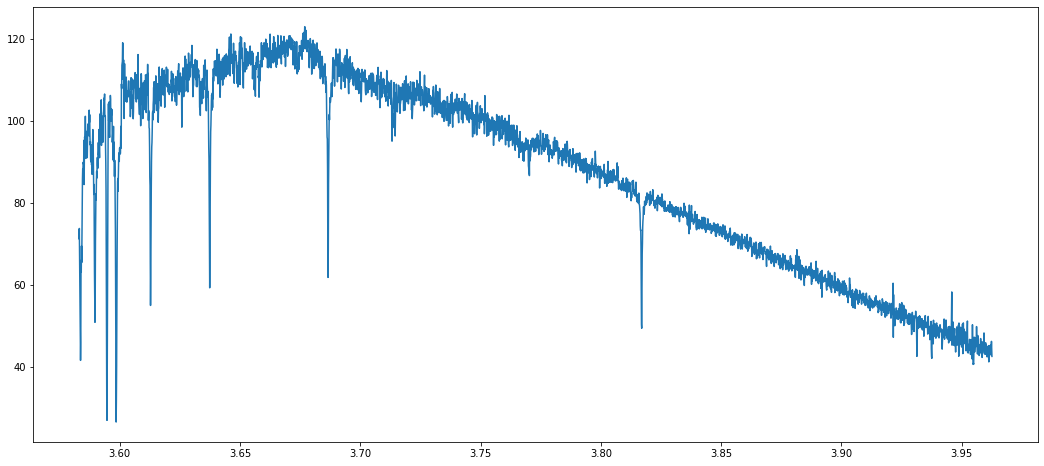

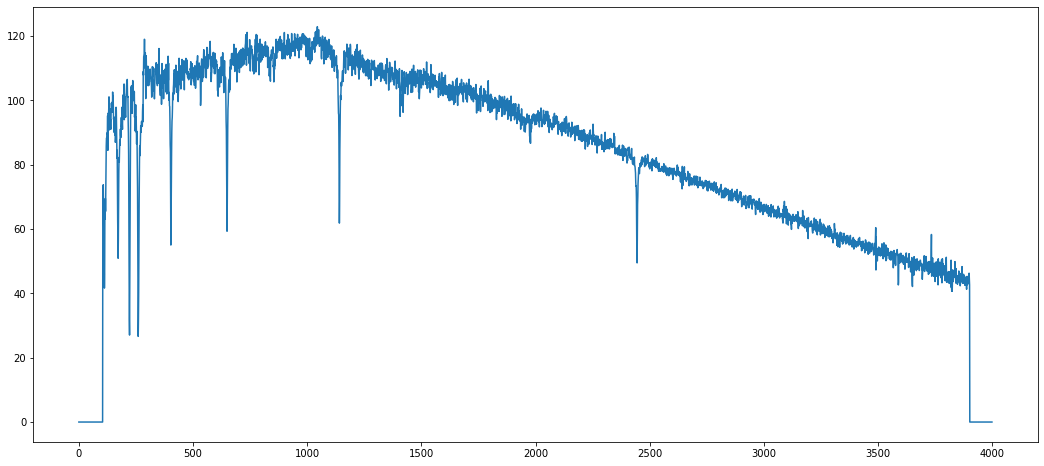

In [138]:
i = np.random.randint(300000)
plt.plot(read_spectra(files[i])[0], read_spectra(files[i])[1])
plt.show()
plt.plot(A[i])
plt.show()

In [30]:
np.save('spectra_vecs_1.npy', A[:100000])

In [34]:
np.save('spectra_vecs_2.npy', A[100000:200000])

In [35]:
np.save('spectra_vecs_3.npy', A[200000:])